In [1]:
%matplotlib inline

from __future__ import division
import numpy as np
import glob
from astropy import units as u
from astropy.coordinates import SkyCoord
#import healpy as hp
import matplotlib.pyplot as plt
import plot2
from matplotlib.ticker import Formatter, FixedFormatter, FixedLocator
from matplotlib import text


In [2]:
#Import data from a text file (using RA and DEC in two columns)

psr_positions = np.loadtxt('/Users/Zach/Desktop/nanograv_plots/nanograv_sources_11-2017.txt', usecols=(0,1))
c = SkyCoord(ra=psr_positions[:,0]*u.degree, dec=psr_positions[:,1]*u.degree, frame='icrs')
print c.ra.radian, c.dec.radian


[ 0.10157816  0.13247049  0.96220002  1.07442469  1.35053578  1.56032435
  1.59121668  1.61477862  1.63066112  1.66347331  1.72909769  1.7673204
  1.87238922  2.01568075  2.49093391  2.67070282  2.67419348  2.71817578
  2.72533163  2.99271607  3.40356657  3.45889351  3.89993821  3.90796673
  4.19210633  4.25197112  4.32265696  4.36419579  4.37972922  4.4755478
  4.51167612  4.53523806  4.58306008  4.62075919  4.6324529   4.64449567
  4.648859    4.65880737  4.67468987  4.72181376  4.762829    4.85323705
  4.90350253  4.94748483  4.98727834  5.0167744   5.01869426  5.02619918
  5.05569524  5.07576653  5.14732503  5.16791992  5.1742031   5.2166146
  5.28206445  5.31121145  5.38154822  5.42483238  5.60495036  5.69815094
  5.82451278  5.89013716  5.91090658  5.91108111  6.03360322  6.09695868
  6.11877529] [ 0.16475908  0.08499753  0.72466071  0.53581608  0.15620697  0.27628562
  0.64594636 -0.36599554 -0.03490659  0.44087017  0.89011792  0.88994339
  0.0869174   1.15767689 -0.33196162 -0.

In [3]:
# plotting function stolen from bayestar; modified so axes are sent back 

def outline_text(ax):
    """If we are using a new enough version of matplotlib, then
    add a white outline to all text to make it stand out from the background."""
    try:
        # Try to import matplotlib.patheffects (requires matplotlib 1.0+).
        from matplotlib import patheffects
    except ImportError:
        # If import failed, print a warning and do nothing.
        warnings.warn("This version of matplotlib does not support path effects.")
    else:
        # Otherwise, add the path effects.
        effects = [patheffects.withStroke(linewidth=2, foreground='w', zorder=2)]
        for artist in ax.findobj(text.Text):
            artist.set_path_effects(effects)
            

            

In [4]:
# plotting parameters to gussy things up a li'l

def figsize(scale):
    fig_width_pt = 513.17 #469.755    # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0 / 72.27         # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0    # Aesthetic ratio
    fig_width = fig_width_pt * inches_per_pt * scale  # width in inches
    fig_height = fig_width * golden_mean              # height in inches
    fig_size = [fig_width, fig_height]
    return fig_size
            

plt.rcParams.update(plt.rcParamsDefault)
params = {'backend': 'pdf',
    'axes.labelsize': 10,
        'lines.markersize': 4,
        'font.size': 10,
        'xtick.major.size':6,
        'xtick.minor.size':3,
        'ytick.major.size':6,
        'ytick.minor.size':3,
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.2,
        'legend.fontsize': 7,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        #'savefig.dpi':200,
        #'path.simplify':True,
        #'font.family': 'serif',
        #'font.serif':'Times',
        #'text.latex.preamble': [r'\usepackage{amsmath}'],
        #'text.usetex':True,
        'figure.figsize': figsize(1)}

#plt.rcParams.update(params)

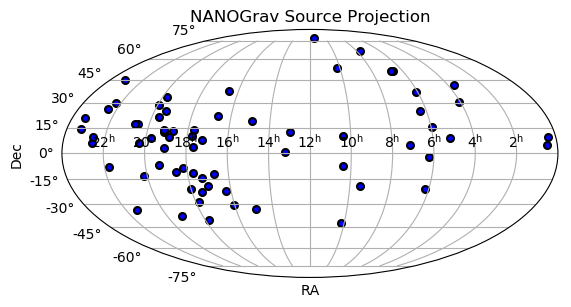

In [5]:
# create projection
ax = plt.subplot(111, projection='astro mollweide')
ax.grid()

# this makes text easier to see on dark colors 
#plot2.outline_text(ax)

# flip map
#h_upper_f = h_upper[flipid]


#add labels
ax.set_xlabel("RA")
ax.set_ylabel("Dec")


# add pulsars, configure marker shapes
ax.plot(c.ra.radian,c.dec.radian, 
        '.', color='b', markersize=10, mew=1.5, mec='k', zorder=1)


plt.title('NANOGrav Source Projection')
#plt.suptitle(r'95\% Characteristic Strain Upper Limit, $h_{95}$', y=0.05)
#plt.colorbar(orientation='horizontal', shrink=0.5)
plt.show()

#plt.savefig('/Users/Zach/Desktop/nanograv_plots/source_projection_plot_1.pdf',bbox_inches='tight',dpi=400)